In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [4]:
incident_df = pd.read_csv("../incident_data/yearly_incident_data/all_incidents.csv",encoding='utf8',low_memory=False)
# Drop the null columns where all values are null
incident_df = incident_df.dropna(axis='columns', how='all')
# Drop the null rows
incident_df = incident_df.dropna()
incident_df.head()

,publicAddress,caseNumber,precinct,offense,description,ucrCode,lat,lon,neighborhood,incidentDate,incidentTime
0,0056Xx Lyndale Av S,MP2010000051,5,CSCR,Crim Sex Cond-Rape,3.0,44.900291,-93.288239,Windom,2010/01/01,00:30
1,0001Xx 62 St W,MP2010000099,5,ROBPAG,Robbery Per Agg,4.0,44.890636,-93.280041,Windom,2010/01/01,01:05
2,0039Xx 5 Av S,MP2010000373,3,BURGD,Burglary Of Dwelling,6.0,44.931448,-93.268841,Bryant,2010/01/01,04:18
3,0013Xx Nicollet Av S,MP2010000305,1,ASLT2,Asslt W/Dngrs Weapon,5.0,44.970506,-93.277714,Loring Park,2010/01/01,03:00
4,0034Xx Oliver Av N,MP2010000229,4,BURGD,Burglary Of Dwelling,6.0,45.017746,-93.306988,Folwell,2010/01/01,02:23


In [5]:
# create date value fields

incident_df['incidentDate'] = pd.to_datetime(incident_df['incidentDate'], format='%Y/%m/%d')
incident_df['month']= incident_df['incidentDate'].dt.month 
incident_df['weekday'] =  incident_df['incidentDate'].dt.dayofweek
incident_df['day'] =  incident_df['incidentDate'].dt.day

incident_df.head()

,publicAddress,caseNumber,precinct,offense,description,ucrCode,lat,lon,neighborhood,incidentDate,incidentTime,month,weekday,day
0,0056Xx Lyndale Av S,MP2010000051,5,CSCR,Crim Sex Cond-Rape,3.0,44.900291,-93.288239,Windom,2010-01-01,00:30,1,4,1
1,0001Xx 62 St W,MP2010000099,5,ROBPAG,Robbery Per Agg,4.0,44.890636,-93.280041,Windom,2010-01-01,01:05,1,4,1
2,0039Xx 5 Av S,MP2010000373,3,BURGD,Burglary Of Dwelling,6.0,44.931448,-93.268841,Bryant,2010-01-01,04:18,1,4,1
3,0013Xx Nicollet Av S,MP2010000305,1,ASLT2,Asslt W/Dngrs Weapon,5.0,44.970506,-93.277714,Loring Park,2010-01-01,03:00,1,4,1
4,0034Xx Oliver Av N,MP2010000229,4,BURGD,Burglary Of Dwelling,6.0,45.017746,-93.306988,Folwell,2010-01-01,02:23,1,4,1


In [6]:
# Get one hot encoding of columns 'vehicleType'
one_hot = pd.get_dummies(incident_df['neighborhood'])
# Drop column as it is now encoded
incident_df = incident_df.drop('neighborhood',axis = 1)
# Join the encoded df
incident_df = incident_df.join(one_hot)
incident_df

,publicAddress,caseNumber,precinct,offense,description,ucrCode,lat,lon,incidentDate,incidentTime,...,Ventura Village,Victory,Waite Park,Webber - Camden,Wenonah,West Calhoun,Whittier,Willard - Hay,Windom,Windom Park
0,0056Xx Lyndale Av S,MP2010000051,5,CSCR,Crim Sex Cond-Rape,3.0,44.900291,-93.288239,2010-01-01,00:30,...,0,0,0,0,0,0,0,0,1,0
1,0001Xx 62 St W,MP2010000099,5,ROBPAG,Robbery Per Agg,4.0,44.890636,-93.280041,2010-01-01,01:05,...,0,0,0,0,0,0,0,0,1,0
2,0039Xx 5 Av S,MP2010000373,3,BURGD,Burglary Of Dwelling,6.0,44.931448,-93.268841,2010-01-01,04:18,...,0,0,0,0,0,0,0,0,0,0
3,0013Xx Nicollet Av S,MP2010000305,1,ASLT2,Asslt W/Dngrs Weapon,5.0,44.970506,-93.277714,2010-01-01,03:00,...,0,0,0,0,0,0,0,0,0,0
4,0034Xx Oliver Av N,MP2010000229,4,BURGD,Burglary Of Dwelling,6.0,45.017746,-93.306988,2010-01-01,02:23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235545,00008X 8Th St S,MP2020708915,1,SHOPLF,Shoplifting,7.0,44.975633,-93.272376,2020-12-24,14:45,...,0,0,0,0,0,0,0,0,0,0
235546,00008X 8Th St S,MP2020708916,1,SHOPLF,Shoplifting,7.0,44.975633,-93.272376,2020-12-24,15:45,...,0,0,0,0,0,0,0,0,0,0
235547,0006Xx Washington Ave Se,MP2020708917,2,BIKETF,Bike Theft,7.0,44.973658,-93.229494,2020-12-22,11:00,...,0,0,0,0,0,0,0,0,0,0
235548,0025Xx 36Th Ave N,MP2020321240,4,THFTSW,Theft By Swindle,7.0,45.020468,-93.312715,2020-12-27,17:00,...,0,0,0,0,0,0,0,0,0,0


In [7]:
selected_features = incident_df.drop(["description","caseNumber","offense","ucrCode",
                                      "publicAddress","incidentDate","incidentTime"],axis=1)

selected_features.head(25)

,precinct,lat,lon,month,weekday,day,Armatage,Audubon Park,Bancroft,Beltrami,...,Ventura Village,Victory,Waite Park,Webber - Camden,Wenonah,West Calhoun,Whittier,Willard - Hay,Windom,Windom Park
0,5,44.900291,-93.288239,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5,44.890636,-93.280041,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,44.931448,-93.268841,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,44.970506,-93.277714,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,45.017746,-93.306988,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,44.938647,-93.274069,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,44.950635,-93.262651,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,44.949510,-93.314613,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,44.976420,-93.272680,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,44.948351,-93.269666,1,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = selected_features
y = incident_df["ucrCode"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.65,test_size=0.35)
X_train.head()

,precinct,lat,lon,month,weekday,day,Armatage,Audubon Park,Bancroft,Beltrami,...,Ventura Village,Victory,Waite Park,Webber - Camden,Wenonah,West Calhoun,Whittier,Willard - Hay,Windom,Windom Park
95270,5,44.916848,-93.293413,6,2,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98269,3,44.911683,-93.230967,8,6,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53431,3,44.922509,-93.207640,7,4,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179553,2,44.966816,-93.224299,6,5,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
169549,3,44.947458,-93.253773,2,0,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.5491758967073584

In [12]:
predictions = rf.predict(X_test_scaled)
print(predictions)

[7. 7. 7. ... 7. 7. 7.]


In [13]:
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.5491747789707415
Testing Data Score: 0.5491758967073584


In [14]:
importances = rf.feature_importances_
importances

array([1.64728424e-01, 1.58826213e-01, 1.08265264e-01, 3.30175281e-03,
       6.17103694e-03, 2.44129309e-03, 0.00000000e+00, 1.93391871e-04,
       6.49186657e-04, 0.00000000e+00, 1.06786312e-04, 3.00191638e-03,
       0.00000000e+00, 6.42987995e-05, 1.21286018e-03, 2.55138769e-04,
       9.34643613e-04, 9.79619247e-03, 6.60981017e-03, 0.00000000e+00,
       4.65622271e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.37089264e-02, 1.46589633e-01, 0.00000000e+00, 2.83910360e-03,
       7.73193097e-03, 2.04152344e-03, 1.03474370e-03, 0.00000000e+00,
       0.00000000e+00, 5.54631813e-02, 0.00000000e+00, 0.00000000e+00,
       1.51192912e-05, 3.99371800e-02, 0.00000000e+00, 4.35079419e-04,
       2.91807571e-03, 0.00000000e+00, 3.74701949e-02, 0.00000000e+00,
       4.28220862e-05, 0.00000000e+00, 7.87285468e-04, 1.96662647e-02,
       4.29882215e-05, 3.92409855e-05, 1.92906026e-02, 5.01098423e-03,
       1.03081290e-03, 1.49305555e-02, 0.00000000e+00, 3.56545327e-04,
      

In [15]:
feature_names = selected_features.columns

sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.16472842356191547, 'precinct'),
 (0.15882621338041933, 'lat'),
 (0.14658963290060234, 'Downtown West'),
 (0.10826526392969105, 'lon'),
 (0.05546318130506196, 'Folwell'),
 (0.04288393298301988, 'Willard - Hay'),
 (0.0399371799727364, 'Hawthorne'),
 (0.037470194873632325, 'Jordan'),
 (0.025624785290408035, 'Northeast Park'),
 (0.025583343901678428, 'Mckinley'),
 (0.019666264695222414, 'Lind - Bohanon'),
 (0.019290602583621197, 'Longfellow'),
 (0.017974684072202967, 'Webber - Camden'),
 (0.014930555451358777, 'Lowry Hill East'),
 (0.013708926366878973, 'Downtown East'),
 (0.010807626051502976, 'Ventura Village'),
 (0.00979619247165977, 'Central'),
 (0.009610433286154359, 'Standish'),
 (0.00791285439726064, 'Powderhorn Park'),
 (0.007731930972145384, 'East Phillips'),
 (0.007009432596219047, 'North Loop'),
 (0.0066098101732637825, 'Cleveland'),
 (0.006171036941950623, 'weekday'),
 (0.005834950127450949, 'Nicollet Island - East Bank'),
 (0.005010984225144174, 'Loring Park'),
 (0.0044180

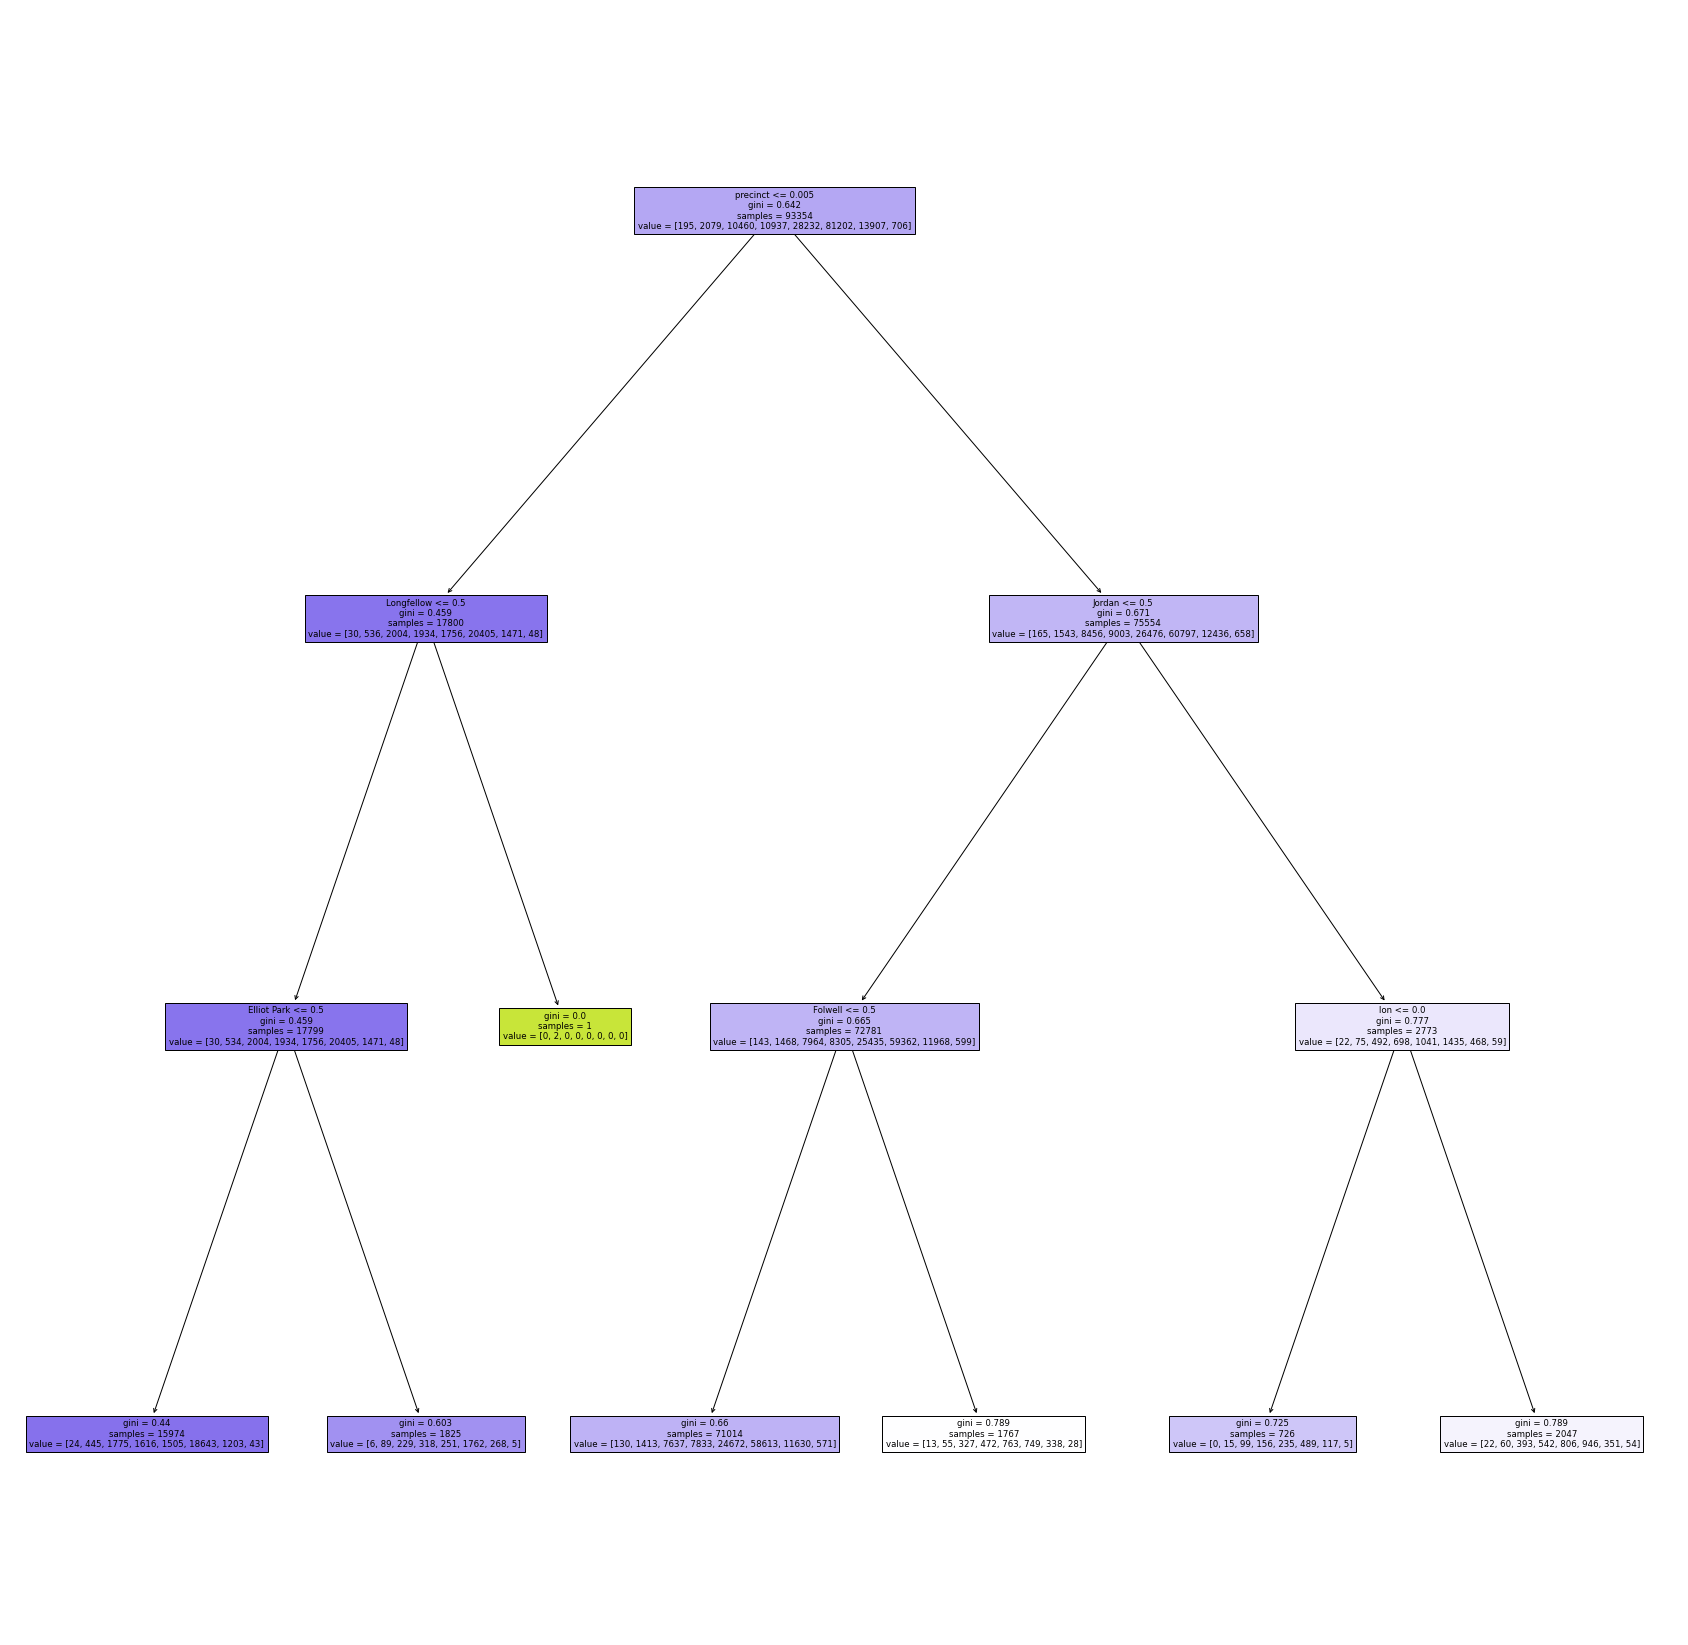

In [16]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,30))
_ = tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True)
plt.savefig('../resources/rf_plot_tree.png')
plt.show()

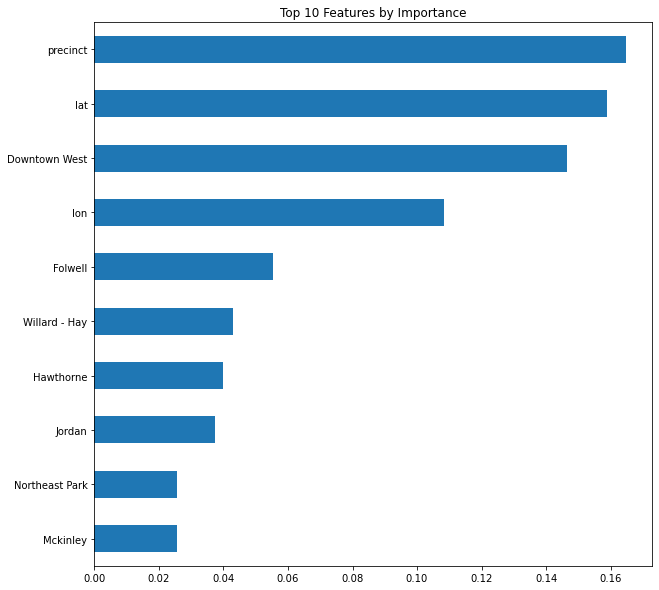

In [17]:
feature_sr = pd.Series(rf.feature_importances_, index=X.columns).\
    nlargest(10).\
    sort_values(ascending=True).\
    plot(kind='barh',title="Top 10 Features by Importance", figsize=(10, 10))

##feature_sr.plot().get_figure().savefig('../resources/rf_top_10_features.png')
plt.savefig('../resources/rf_top_10_features.png')

In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [750, 1000, 1250],
              'max_depth': [1, 10, 50],
              'criterion': ['gini', 'entropy']}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [19]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] criterion=gini, max_depth=1, n_estimators=750 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=1, n_estimators=750, score=0.549, total=  20.8s
[CV] criterion=gini, max_depth=1, n_estimators=750 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=750, score=0.549, total=  21.2s
[CV] criterion=gini, max_depth=1, n_estimators=750 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.9s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, n_estimators=750, score=0.549, total=  21.5s
[CV] criterion=gini, max_depth=1, n_estimators=750 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=750, score=0.549, total=  20.8s
[CV] criterion=gini, max_depth=1, n_estimators=750 ...................
[CV]  criterion=gini, max_depth=1, n_estimators=750, score=0.549, total=  20.9s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV]  criterion=gini, max_depth=1, n_estimators=1000, score=0.549, total=  27.7s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV]  criterion=gini, max_depth=1, n_estimators=1000, score=0.549, total=  27.5s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV]  criterion=gini, max_depth=1, n_estimators=1000, score=0.549, total=  27.5s
[CV] criterion=gini, max_depth=1, n_estimators=1000 ..................
[CV]  criterion=gini, max_depth=1, n_estimators=1000, score=0.549, total=  27.5s
[CV] crite

[CV]  criterion=entropy, max_depth=1, n_estimators=1250, score=0.549, total=  30.1s
[CV] criterion=entropy, max_depth=1, n_estimators=1250 ...............
[CV]  criterion=entropy, max_depth=1, n_estimators=1250, score=0.549, total=  30.3s
[CV] criterion=entropy, max_depth=1, n_estimators=1250 ...............
[CV]  criterion=entropy, max_depth=1, n_estimators=1250, score=0.549, total=  29.9s
[CV] criterion=entropy, max_depth=1, n_estimators=1250 ...............
[CV]  criterion=entropy, max_depth=1, n_estimators=1250, score=0.549, total=  30.2s
[CV] criterion=entropy, max_depth=10, n_estimators=750 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=750, score=0.549, total= 1.6min
[CV] criterion=entropy, max_depth=10, n_estimators=750 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=750, score=0.549, total= 1.6min
[CV] criterion=entropy, max_depth=10, n_estimators=750 ...............
[CV]  criterion=entropy, max_depth=10, n_estimators=750, score=0.549, 

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 222.5min finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 50],
                         'n_estimators': [750, 1000, 1250]},
             verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1250}
0.5495335700946138
